<a href="https://colab.research.google.com/github/ygordev/Data-Science/blob/main/YgorLima_Projeto_Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align='center'><img alt="Colaboratory logo" width="35%" src="https://laboratoriodebits.com.br/wp-content/uploads/2022/01/ygor-lima-ds-e1642745580848.png">

# **Projeto - Detecção de Fraudes em Cartão de Crédito**
por [Ygor Moreira Lima](https://ds.laboratoriodebits.com.br)</u>

<p align='center'>
  <u>Links</u><br>
<a href="https://github.com/ygordev"><img height="30" src="https://github.com/ygordev/ygordev/raw/main/github.png"></a>&nbsp;&nbsp;
<a href="https://instagram.com/colt7r"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/instagram.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://www.linkedin.com/in/ygormoreiralima"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/linkedin.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://facebook.com/ywml10"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/facebook.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://medium.com/ygorlimahome"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/medium.png?raw=true"></a>&nbsp;&nbsp;
</p>

---  

## Introdução

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<center><img width="65%" src="https://laboratoriodebits.com.br/wp-content/uploads/2022/01/Fraud-Credit-Card-Banner.png"></center>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
!pip install scikit-plot

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [63]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import missingno

sns.set_style('whitegrid', {'axes.grid': False}) 

# É possível obter a mesma aparência utilizando o estilo 'white'. No entanto,
# O uso de uma kwargs de rcParams permite um controle maior de customização

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# OBS: Os modelos serão importados nas células correspondentes

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [5]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

### Dividindo o dataset em conjunto de treino e teste

In [6]:
print("Dimensão do dataset original: ", df.shape)

# Fazendo o split do dataset com 15% para teste
test = df.sample(frac=0.15, random_state=5)
df = df.drop(test.index)

print("Dimensão do dataset de Treino: ", df.shape)
print("Dimensão do dataset de Teste: ", test.shape)

Dimensão do dataset original:  (284807, 31)
Dimensão do dataset de Treino:  (242086, 31)
Dimensão do dataset de Teste:  (42721, 31)


## Análise Exploratória

A Análise Exploratória é um primeiro contato com o dataset no qual estamos trabalhando. Para isso, faz-se necessário verificar como os dados estão dispostos, além de buscar possíveis tratamentos que devam ser feitos.

### Visualizando as 5 primeiras entradas do dataset

In [7]:
# Visualizando as 5 primeiras entradas do dataset
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


Através da inspeção inicial em nosso dataset, podemos perceber que as variáveis $V1, \dots, V28$ provavelmente passaram por algum processo de padronização. No entanto, o mesmo não ocorreu com `Time` e `Amount`. Iremos fazer o tratamento posteriormente.

### Verificando os tipos das variáveis do nosso dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242086 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    242086 non-null  float64
 1   V1      242086 non-null  float64
 2   V2      242086 non-null  float64
 3   V3      242086 non-null  float64
 4   V4      242086 non-null  float64
 5   V5      242086 non-null  float64
 6   V6      242086 non-null  float64
 7   V7      242086 non-null  float64
 8   V8      242086 non-null  float64
 9   V9      242086 non-null  float64
 10  V10     242086 non-null  float64
 11  V11     242086 non-null  float64
 12  V12     242086 non-null  float64
 13  V13     242086 non-null  float64
 14  V14     242086 non-null  float64
 15  V15     242086 non-null  float64
 16  V16     242086 non-null  float64
 17  V17     242086 non-null  float64
 18  V18     242086 non-null  float64
 19  V19     242086 non-null  float64
 20  V20     242086 non-null  float64
 21  V21     24

Trata-se de um conjunto cujas variáveis são exclusivamente numéricas. A variável Class é o nosso Target Vector, e está em formato binário, 0 ou 1, sendo 0 uma transação normal, e 1 uma transação fraudulenta.

### Visualizando o resumo estatístico do dataset

In [9]:
# Visualizando o resumo estatístico do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,2.420860e+05,242086.000000,242086.000000
mean,94805.978301,-0.001232,0.000899,-0.000574,0.001295,-0.000624,-0.000132,-0.000223,-0.002098,0.001669,0.000610,0.000425,-0.000668,-0.000755,0.000642,-0.001372,0.000354,0.000159,0.000784,-0.000832,0.000662,0.000364,-0.000191,-0.000545,-0.000796,-0.000220,-0.000283,-0.000174,1.990692e-07,88.574882,0.001735
std,47468.374176,1.957025,1.652058,1.516746,1.416269,1.378980,1.331310,1.244146,1.206281,1.099271,1.091317,1.022248,1.000547,0.995990,0.960312,0.915297,0.876372,0.848320,0.838197,0.813976,0.777543,0.741406,0.726420,0.621606,0.605488,0.520968,0.482353,0.404685,3.191910e-01,254.023603,0.041616
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-13.563273,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-1.543008e+01,0.000000,0.000000
25%,54237.000000,-0.921408,-0.598574,-0.890060,-0.847639,-0.691832,-0.767957,-0.555215,-0.208572,-0.642592,-0.535319,-0.762622,-0.405832,-0.649378,-0.425064,-0.583702,-0.468118,-0.484088,-0.498337,-0.457243,-0.212083,-0.228552,-0.542485,-0.162297,-0.355456,-0.317318,-0.327354,-0.070949,-5.306702e-02,5.500000,0.000000
50%,84759.500000,0.017962,0.065534,0.179237,-0.018722,-0.054334,-0.273135,0.039822,0.022317,-0.049957,-0.092068,-0.032741,0.139332,-0.014354,0.051184,0.046889,0.066551,-0.065385,-0.002621,0.003349,-0.062557,-0.029280,0.006661,-0.011193,0.040438,0.016426,-0.051710,0.001204,1.119504e-02,22.000000,0.000000
75%,139269.750000,1.315659,0.804053,1.027404,0.746314,0.611169,0.399920,0.570426,0.327325,0.600083,0.455995,0.740439,0.618322,0.660750,0.493179,0.647319,0.523498,0.400388,0.501580,0.458691,0.133119,0.186112,0.528294,0.147556,0.438709,0.350435,0.240924,0.090991,7.834528e-02,77.460000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.099309,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,1.612961e+01,25691.160000,1.000000


### Verificando o balaceamento do dataset

[[Text(0, 0, 'Normal'), Text(0, 0, 'Fraude')]]

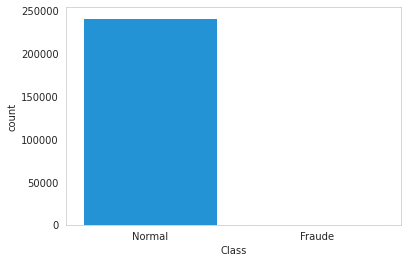

In [59]:
# Verificando o balanceamento do dataset

paleta = {classes: "xkcd:azure" if classes == 0 else "xkcd:coral" for classes in df.Class.unique()}

plot = sns.countplot('Class', data=df, palette=paleta)
plot.set(xticklabels=['Normal', 'Fraude'])

Podemos observar pelo gráfico acima que trata-se de um dataset extremamente desbalanceado, sendo impossível ver, inicialmente, a representação gráfica da nossa classe 'Fraude'. Para isso, iremos calcular logo abaixo o valor percentual de transações fraudulentas no dataset.

In [11]:
# Calculando a % de fraudes
print("Fraudes representam {:.4f}% do total de entradas".format((df[df.Class == 1].shape[0] / df.shape[0])*100))

Fraudes representam 0.1735% do total de entradas


### Verificando valores ausentes

In [12]:
# Mostrar porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

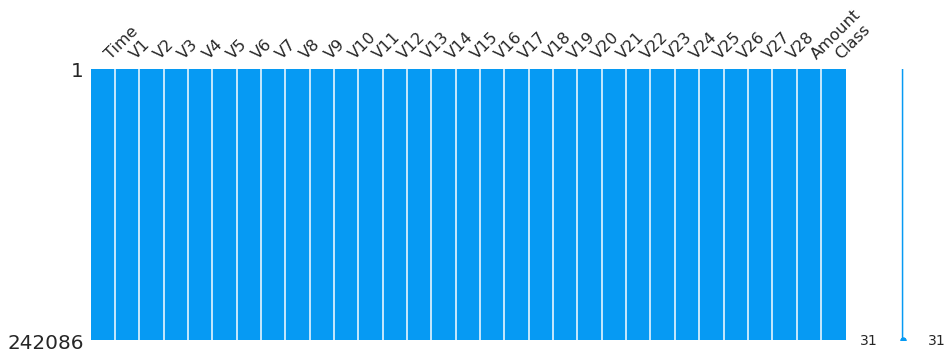

In [50]:
# Visualização gráfica de valores ausentes.
# Cor 'GOLD': 255, 215, 0 -> rgbConverter(255, 215, 0)
# Cor 'XKCD:AZURE': 6, 154, 243 -> rgbConverter(6, 154, 243)

def rgbConverter(r, g, b):
  r_percentage = "{:.3f}".format(r/255)
  g_percentage = "{:.3f}".format(g/255)
  b_percentage = "{:.3f}".format(b/255)
  return (float(r_percentage), float(g_percentage), float(b_percentage))

missingno.matrix(df, figsize=(15,5), color=rgbConverter(6, 154, 243))

Conforme resultado acima, não há valores ausentes, em nenhuma variável. Trata-se de um dataset bem tratado.

### Histograma Time x Class

Text(0.5, 0, 'Tempo (s)')

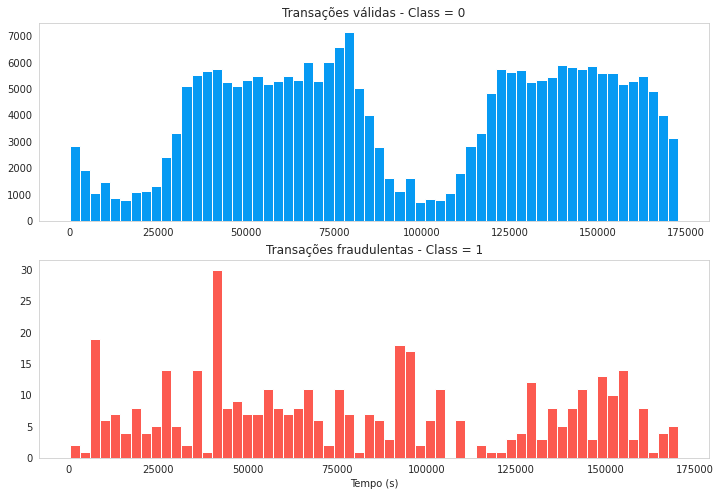

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

num_bins = 60

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='xkcd:azure')
ax[0].set_title('Transações válidas - Class = 0')
ax[0].set_facecolor('xkcd:white')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='xkcd:coral')
ax[1].set_title('Transações fraudulentas - Class = 1')
ax[1].set_facecolor('xkcd:white')

plt.xlabel('Tempo (s)')

### Histograma Amount x Class

Text(0.5, 0, 'Quantidade')

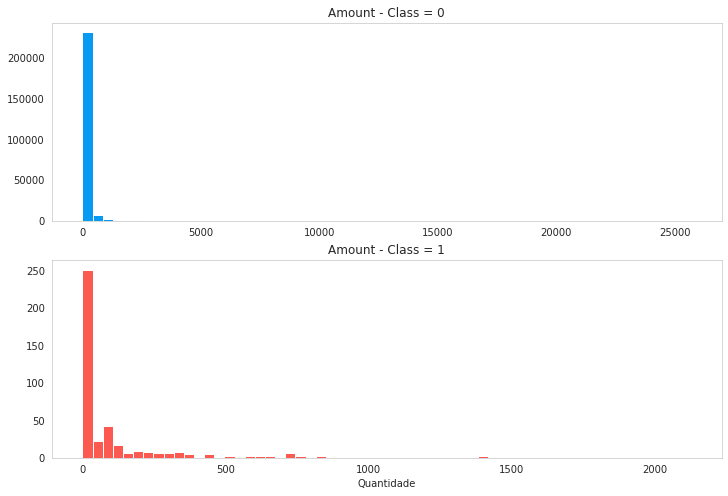

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

num_bins = 60

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins, color='xkcd:azure')
ax[0].set_title('Amount - Class = 0')
ax[0].set_facecolor('xkcd:white')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins, color='xkcd:coral')
ax[1].set_title('Amount - Class = 1')
ax[1].set_facecolor('xkcd:white')

plt.xlabel('Quantidade')

### Boxplot Class x Amount

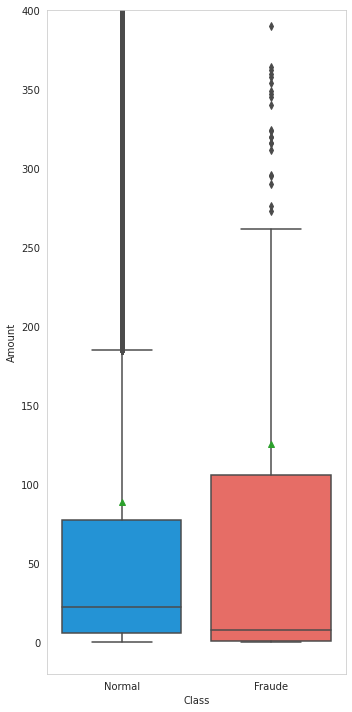

In [58]:
fig, ax = plt.subplots(figsize=(5,10), sharex=True)

paleta = {classes: "xkcd:azure" if classes == 0 else "xkcd:coral" for classes in df.Class.unique()}

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax, palette=paleta) # x: df.Class, y: df.Amount
plt.ylim((-20, 400))

# Como no eixo x temos diversos valores possíveis
# para df.Class, podemos alterar os rótulos desses ticks.
plt.xticks([0, 1], ['Normal', 'Fraude']) 

plt.tight_layout()

### Gráfico de Densidade

O gráfico de densidade possui uma utilidade enorme para compararmos as distribuições de cada variável. Sendo assim, torna-se possível ver quais são as variáveis mais importantes para a detecção de anomalidas.

Conforme a [documentação oficial](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) do da biblioteca de visualização de dados Seaborn:

> A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Tendo o gráfico de densidade da variável-alvo, iremos buscar distribuições que **diferem uma da outra**, permitindo identificar fraudes com mais facilidade. 



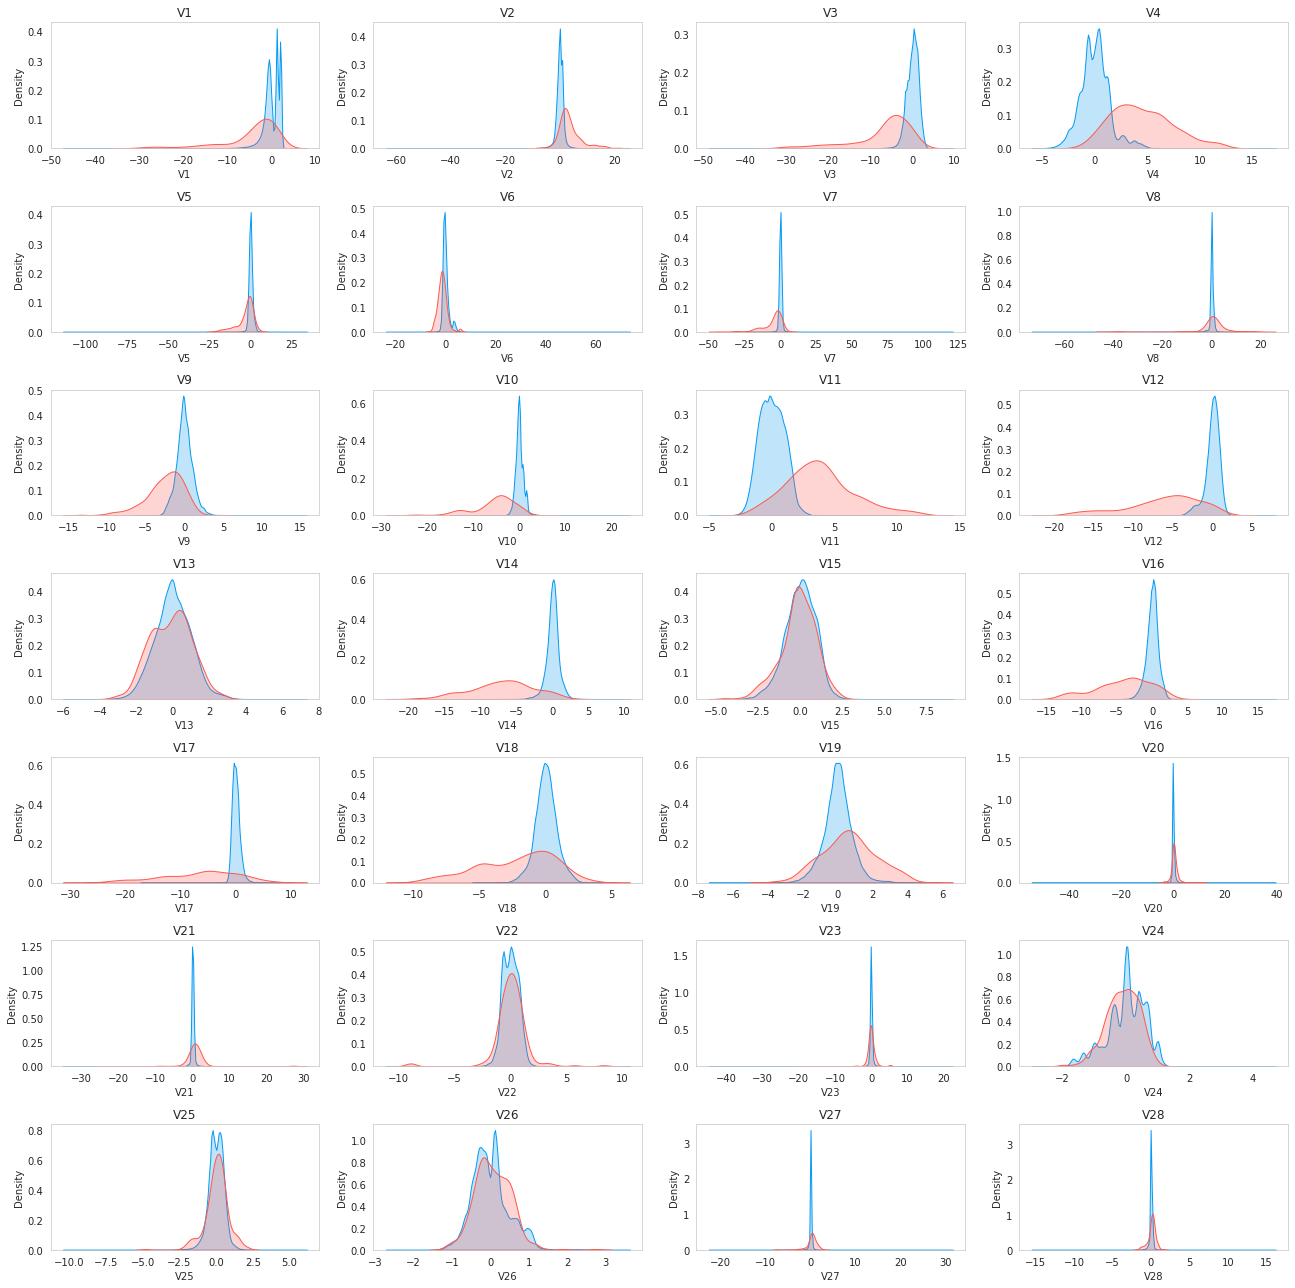

In [60]:
# Obtendo um objeto do tipo Index, contendo as variáveis do dataset, com exceção
# de Class, Amount e Time
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

# Separando o dataset conforme os diferentes valores de Class
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

# Criando um objeto do tipo figure, que comportará 28 axes
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

# Variável de controle para a plotagem dos axes
subplot_atual = 0

# Iterando as variáveis do dataset e plotando o gráfico de densidade
for col in column_names:
  subplot_atual += 1
  plt.subplot(7, 4, subplot_atual)
  sns.kdeplot(df_class_0[col], shade=True, color='xkcd:azure')
  sns.kdeplot(df_class_1[col], shade=True, color='xkcd:coral')
  plt.title(col, fontsize=12)

plt.tight_layout()

A visualização acima nos permite concluir que as variáveis `V3, V4, V10, V11` e, ainda, `V17` possuem um comportamento bem distinto. 

## Preparação dos Dados



### Normalização dos Dados

In [18]:
# Para efetuarmos a normalização dos dados, iremos realizar uma cópia do dataframe
df_clean = df.copy()

# Instanciando um novo objeto StandardScaler para a normalização
stdScaler = StandardScaler()

# Criando duas novas colunas no dataset, que conterá os dados normalizados
df_clean['std_amount'] = stdScaler.fit_transform(df_clean.Amount.values.reshape(-1, 1))
df_clean['std_time'] = stdScaler.fit_transform(df_clean.Time.values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

Conforme a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) da lib Scitkit-Learn, o método `fit_transform` do objeto StandardScaler necessita receber:

> X: array-like of shape (n_samples, n_features) Input samples.

Ou seja: um array-like, contendo os valores que irão ser normalizados, sendo n_samples a quantidade de amostras e n_features = 1. 

In [19]:
# Visualizando as 5 primeiras entradas do dataset com Amount e Time normalizados
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.240313,-1.997249
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.338099,-1.997249
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.141964,-1.997228
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.137488,-1.997228
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.334241,-1.997207


### Divisão dos conjuntos de Treino e Validação

A etapa de divisão dos conjuntos de treino, validação e teste é de extrema importância. Para isso, iremos seguir o workflow abaixo.

<img src="https://laboratoriodebits.com.br/wp-content/uploads/2022/01/spliting.jpg" width="40%">

In [34]:
# No workflow acima, estamos na última etapa: divisão o conjunto 'treino' original em
# um novo conjunto de treino e validação, mantendo o conjunto de teste inalterado.

# Split dos dados de validação e treino
y = df_clean.Class
X = df_clean.drop('Class', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

# Preparação dos dados de teste. Já houve o split logo acima.
y_test = test.Class

test['std_amount'] = stdScaler.fit_transform(test.Amount.values.reshape(-1, 1))
test['std_time'] = stdScaler.fit_transform(test.Time.values.reshape(-1, 1))

test.drop(['Time', 'Amount'], axis=1, inplace=True)

X_test = test.drop('Class', axis=1)

### Balanceamento dos Dados

Conforme observamos acima, os dados estão extremamente desbalanceados, sendo 0.17% dos dados representantes de fraude. Para obtermos uma maior acurácia no treinamento de nosso modelo, precisamos fazer um balanceamento. 

Para a abordagem "sampling" de balanceamento, podemos nos valer de duas técnicas:
* Under-sampling, onde dados da classe majoritária serão desprezados
* Over-sampling, dados da classe minoritária serão reproduzidos em maior quantidade, de forma a equilibrar o dataset.

A abordagem utilizada será 'under-sampling', que se mostrou satisfatória em termos de custo-benefício.

1    315
0    315
Name: Class, dtype: int64


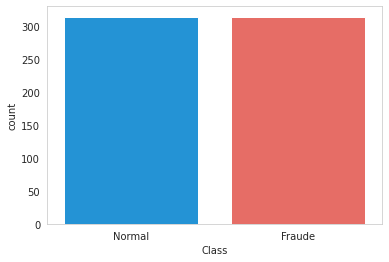

In [61]:
# Apresentação do gráfico
paleta = {classes: "xkcd:azure" if classes == 0 else "xkcd:coral" for classes in df.Class.unique()}

# Utilizando a técnica under-sampling para os dados de treino
# Para isso, devemos instanciar um novo objeto do tipo RandomUnderSampler()
rus = RandomUnderSampler()

# Os dados balanceados serão extraídos das variáveis X_train e y_train.
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts())

plot = sns.countplot(y_rus, palette=paleta)
plot.set(xticklabels=['Normal', 'Fraude']);

Conseguimos, então, amostras balanceadas para o treinamento de um modelo. Iremos comparar o desempenho desta abordagem com um treinamento sem sampling.

### Matriz de Correlação - Desbalanceado x Balanceado

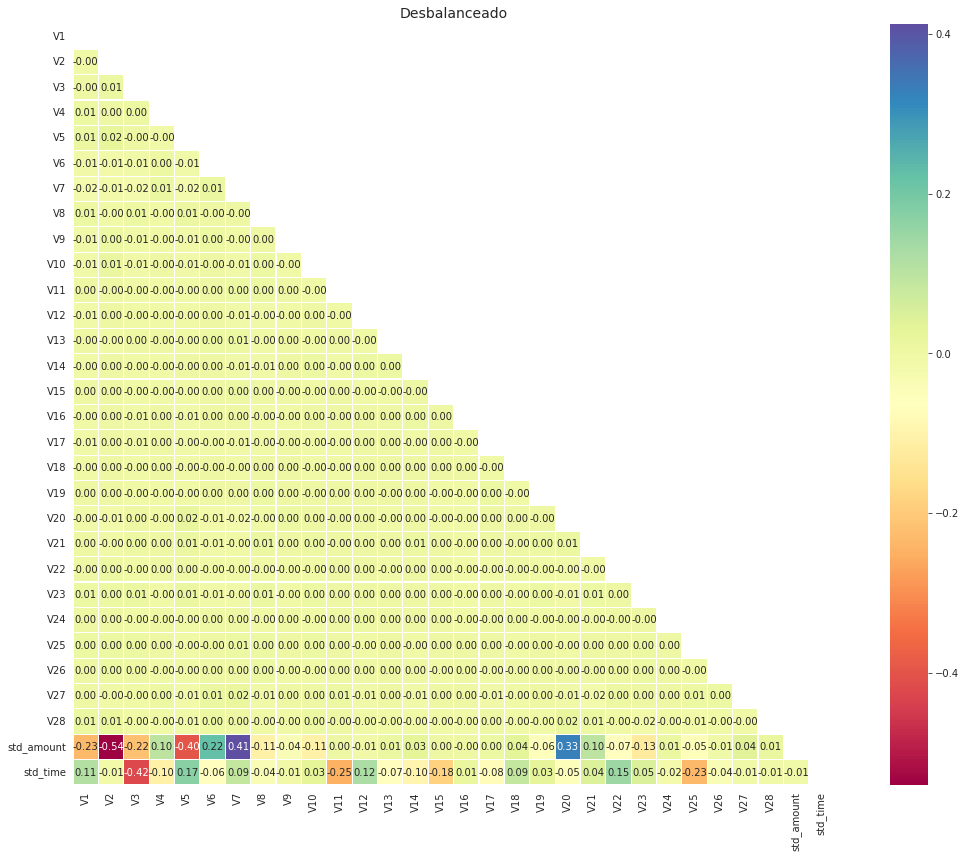

In [69]:
# Criando as matrizes de correlação
corr_des = X_train.corr()
corr_bal = pd.DataFrame(X_rus).corr()

# Criando as máscaras
mask_des = np.zeros_like(corr_des)
mask_bal = np.zeros_like(corr_bal)

mask_des[np.triu_indices_from(mask_des)] = True
mask_bal[np.triu_indices_from(mask_bal)] = True

# Criando a apresentação do gráfico 1
fig, ax = plt.subplots(figsize=(20,14))

sns.heatmap(corr_des, mask=mask_des, xticklabels=corr_des.columns, 
            yticklabels=corr_des.columns, linewidths=.1, cmap='Spectral', 
            square=True, annot=True, fmt='.2f', ax=ax)
ax.set_title('Matriz de Correlação - Dados Desbalanceados', size=14)

plt.show()

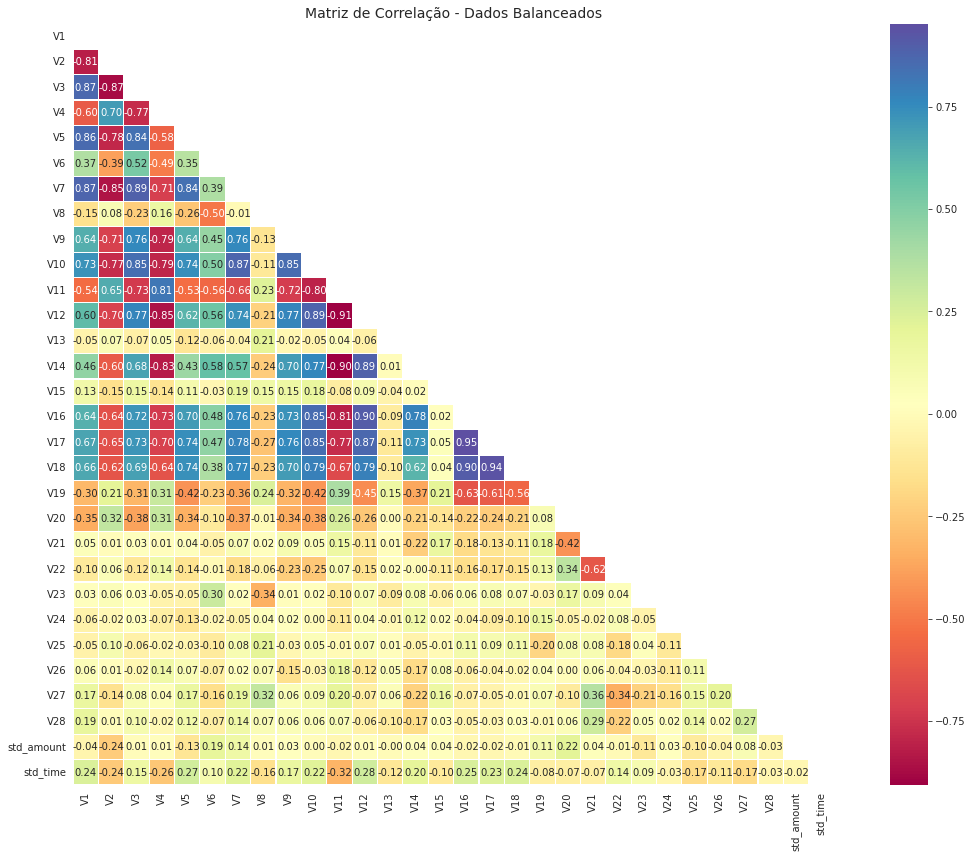

In [73]:
# Criando a apresentação do gráfico 2
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr_bal, mask=mask_bal, xticklabels=corr_bal.columns, 
            yticklabels=corr_bal.columns, linewidths=.1, cmap='Spectral', 
            square=True, annot=True, fmt='.2f', ax=ax)
ax.set_title('Matriz de Correlação - Dados Balanceados', size=14)

plt.show()

Como ficou fácil de perceber, a utilização de dados balanceados para a plotagem da matriz de correlação nos trouxe informações muito valiosas, em oposição aos dados desbalanceados, onde boa parte dos dados apresentados não teria correlação com as outras variáveis.

## Modelo de Machine Learning



Nas palavras de Gonzalez (2018), a regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, em função de uma ou mais
variáveis independentes contínuas e/ou binárias.

Apesar do nome "Regressão Logística", Provost e Fawcett (2016) nos ensinam que este é um nome um tanto equivocado, e esta não faz exatamente o que chamamos de Regressão, que é a estimativa de um valor alvo numérico. A regressão logística aplica modelos lineares para **estimar a probabilidade da classe.**

Ou seja, é o que precisamos. Desta forma, iremos instanciar e treinar um modelo de Regressão Logística.

### Modelo de Regressão Logística utilizando dados desbalanceados

In [28]:
# Instanciando e treinando um modelo de Regressão Logística
# Neste primeiro momento, utilizaremos os dados desbalanceados

# 1. Escolha e importação do modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciando e escolhendo os hyperparameters.
model_des = LogisticRegression()

# 3. Separação dos dados entre Feature Matrix e Target Vector
# 3.1 Divisão do dataset entre Treino e Teste
# 3.2 Padronização dos dados de treino

# 4. Fit do modelo (treinamento)
model_des.fit(X_train, y_train)

# 5. Realizando previsões em cima de novos dados
y_pred = model_des.predict(X_val)
y_proba = model_des.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9993    0.9998    0.9995     60417
           1     0.8451    0.5714    0.6818       105

    accuracy                         0.9991     60522
   macro avg     0.9222    0.7856    0.8407     60522
weighted avg     0.9990    0.9991    0.9990     60522

Acurácia: 0.9991

AUC: 0.7856



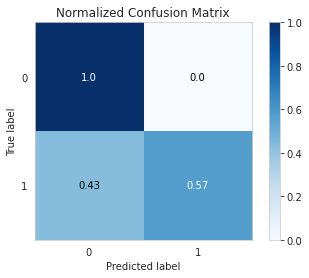

In [29]:
# Plotagem da Matriz de Confusão
fig = skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

### Modelo de Regressão Logística utilizando dados balanceados

In [30]:
# 1. Escolha e importação do modelo

# 2. Instanciando e escolhendo os hyperparameters.
model_bal = LogisticRegression()

# 3. Separação dos dados entre Feature Matrix e Target Vector
# 3.1 Divisão do dataset entre Treino e Teste
# 3.2 Padronização dos dados de treino

# 4. Fit do modelo (treinamento)
model_bal.fit(X_rus, y_rus)

# 5. Realizando previsões em cima de novos dados
y_pred_rus = model_bal.predict(X_val)
y_proba_rus = model_bal.predict_proba(X_val)

# Etapas 1 e 3 do processo de criação de um modelo
# de Machine Learning foram realizadas anteriormente.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9582    0.9786     60417
           1     0.0366    0.9143    0.0705       105

    accuracy                         0.9581     60522
   macro avg     0.5182    0.9363    0.5245     60522
weighted avg     0.9982    0.9581    0.9770     60522

Acurácia: 0.9581

AUC: 0.9363



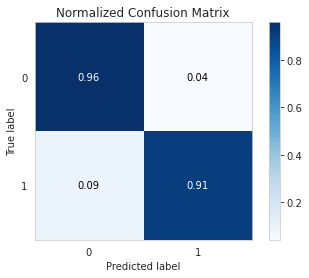

In [32]:
# Plotagem da matriz de confusão
fig = skplt.metrics.plot_confusion_matrix(y_val, y_pred_rus, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_rus, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_rus)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_rus)))

Através da observação dos resultados dos dois modelos de Regressão Logística, podemos concluir que:

*   O balanceamento de dados é extremamente conveniente. Apesar da redução da acurácia global, tivemos um precisão de 91% na previsão de fraudes, que é o nosso objetivo. Com o modelo utilizando dados desbalanceados, obtivemos uma precisão de 57% para a previsão.
*   Não podemos considerar apenas a acurácia global como medida de desempenho. Há de se observar o objetivo principal do modelo. No nosso caso, a capacidade de detecção de fraudes, o quarto quadrante da nossa matriz de confusão.



### Modelo SVM (Support Vector Machine) com Dados Balanceados

In [44]:
# 1. Escolha e importação do modelo
from sklearn import svm

# 2. Instanciando e escolhendo os hyperparameters.
model_bal_svm = svm.SVC()

# 4. Fit do modelo (treinamento)
model_bal_svm.fit(X_rus, y_rus)

# 5. Realizando previsões em cima de novos dados
y_pred_svm = model_bal_svm.predict(X_val)

SVC()

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9808    0.9902     60417
           1     0.0750    0.8952    0.1384       105

    accuracy                         0.9807     60522
   macro avg     0.5374    0.9380    0.5643     60522
weighted avg     0.9982    0.9807    0.9887     60522

Acurácia: 0.9807

AUC: 0.9380



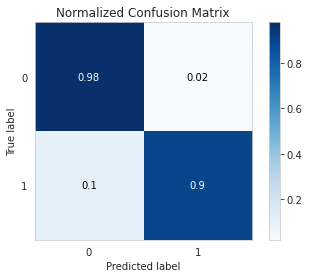

In [48]:
# Plotagem da matriz de confusão
fig = skplt.metrics.plot_confusion_matrix(y_val, y_pred_svm, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_svm, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_svm)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_svm)))

### Desempenho do Modelo de Regressão Logística com Dados de Teste

In [39]:
# Realizando as previsões em cima dos dados de teste

y_prob_test = model_bal.predict(X_test)
y_proba_test = model_bal.predict_proba(X_test)

In [74]:
# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_prob_test, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_prob_test)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_prob_test)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9562    0.9775     42649
           1     0.0331    0.8889    0.0638        72

    accuracy                         0.9560     42721
   macro avg     0.5164    0.9225    0.5207     42721
weighted avg     0.9982    0.9560    0.9760     42721

Acurácia: 0.9560

AUC: 0.9225



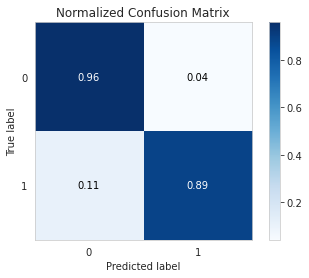

In [78]:
# Plotagem da Matriz de Confusão
fig = skplt.metrics.plot_confusion_matrix(y_test, y_prob_test, normalize=True)

## Avaliação do desempenho do modelo

Através da construção de diversos modelos para a solução do nosso problema, optamos por prosseguir com a Regressão Logística, utilizando dados balanceados, o que nos trouxe os seguintes resultados para os dados de teste:

*   95% de acurácia global
*   89% de acurácia para a previsão de fraudes

Tal resultado é flagrantemente superior à utilização do mesmo modelo de Regressão Logística com dados desbalanceados (99,9% de acurácia global com 57% de acurácia para previsão de fraudes). 

Em comparação com o modelo Support Vector Machine (SVM), houve uma ligeira diferença na capacidade de detecção de fraudes. O modelo SVC foi capaz de proporcionar uma acurácia global de 98,07%. No entanto, para o objetivo desde projeto, obtivemos 90% de acurácia na detecção de fraudes utilizando os dados de validação.



## Conclusão

Os dados disponibilizados vieram bem tratados, tendo sido aplicada a técnica PCA de redução de dimensionalidade. Mesmo assim, ainda houve a necessidade de realizar o balanceamento dos dados, em virtude da característica das fraudes de cartão de crédito serem eventos que ocorrem com pouca frequência.

A criação de diversos modelos mostrou-se extremamente valorosa, por nos mostrar a importância do balanceamento de dados. A introdução de um modelo SVM também foi interessante, por ser uma alternativa à Regressão Logística.

Por fim, convido você a conhecer um pouco mais do meu trabalho sobre Data Science no Medium e Linkedin.

<p align='center'>
  <u>Links</u><br>
<a href="https://github.com/ygordev"><img height="30" src="https://github.com/ygordev/ygordev/raw/main/github.png"></a>&nbsp;&nbsp;
<a href="https://instagram.com/colt7r"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/instagram.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://www.linkedin.com/in/ygormoreiralima"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/linkedin.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://facebook.com/ywml10"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/facebook.png?raw=true"></a>&nbsp;&nbsp;
<a href="https://medium.com/ygorlimahome"><img height="30" src="https://github.com/ygordev/ygordev/blob/main/medium.png?raw=true"></a>&nbsp;&nbsp;
</p>

## Referências

GONZALEZ, Leandro de Azevedo. **Regressão Logística e suas Aplicações**. 2018. Trabalho de Conclusão de Curso (Bacharel em Ciência da Computação) - Universidade Federal do Maranhão, [S. l.], 2018. Disponível em: https://monografias.ufma.br/jspui/bitstream/123456789/3572/1/LEANDRO-GONZALEZ.pdf. Acesso em 29 de janeiro de 2022.

PROVOST, Foster; FAWCETT, Tom. **Data Science para Negócios**: O que você Precisa Saber Sobre Mineração e Pensamento Analítico de Dados. 1. ed. Rio de Janeiro: Alta Books, 2016. 408 p. v. 1. ISBN 978-85-7608-972-8.